
# Booksy 


### Book-Crossings

	
Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv(r'C:\Users\tanay\Documents\Codes\python\RecoSys\data\bookcrossing\BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv(r'C:\Users\tanay\Documents\Codes\python\RecoSys\data\bookcrossing\BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv(r'C:\Users\tanay\Documents\Codes\python\RecoSys\data\bookcrossing\BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']


C:\Users\tanay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expec


#### Ratings Table 

The ratings data set provides a list of ratings that users have given to books. It includes 1,149,780 records and 3 fields: userID, ISBN, and bookRating.

In [19]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
print(ratings.shape)

(1149780, 3)



#### Users Table 

User data consists of anonymized user data but also provides the user demographic information. It includes 278,858 records and 3 fields: user id, location, and age.

In [21]:
users.head(5)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
print(users.shape)

(278858, 3)



#### Books Table 

Book details are included in the Books table. It consists of 271,360 records and 8 fields: ISBN, book title, book author, year of publication, publisher and three sizes of Image Urls for our books.

In [23]:
books.head(5)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [24]:
print(books.shape)

(271360, 8)



#### Rating Distribution

No particular pattern observed in the ratings, making the distribution quite uneven. Also, a large number of 0-valued ratings, which means an undiluted combined matrix will be very sparse

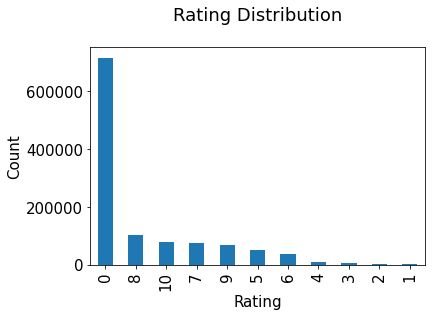

In [25]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()


#### User Demographic

Consider the following distribution of users based on their age. Our users consist predominantly of young and middle-aged readers. Thus, this data will be relevant towards like-aged target users.

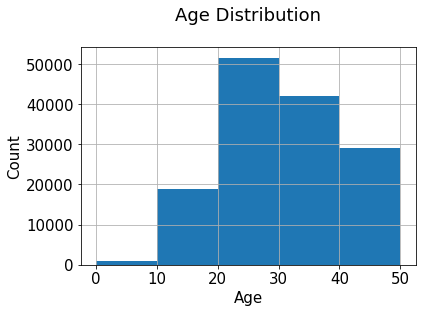

In [26]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

Let us see if we can find any users from India. 

In [27]:
p=0
for i in range(278858):
    if "india" in users['Location'][i] and "indiana" not in users['Location'][i]:
        p=p+1
print(p)

1324


Only 4% of the users are from India, and thus, using Geographical Location as a filter, along with age are ill-advised.


#### Average Rating and Counts

Let us observe what books recieved the most ratings and what was the average rating for them. As is seen in the table, it is not at all necessary that more ratings recieved mean a better book. Either ways, average is a extremely dangerous metric to use in our systems and we'll be avoiding it alltogether. However, rating counts could definetly help us.

In [28]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723



#### Rating Counts and User Counts

Our matrix is very sparse, and along with recommendation problems, we'd also have computational problems. Thus, we'll only consider users who have rated more than 200 books and books which have recieved more than 100 ratings!

In [29]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['ISBN'].value_counts()
ratings = ratings[ratings['ISBN'].isin(counts[counts >= 100].index)]

Let's merge our ratings table with our books table. Irrelevant columns to be dropped.

In [30]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,0060930535,0,The Poisonwood Bible: A Novel
1,254,0060930535,0,The Poisonwood Bible: A Novel
2,6251,0060930535,0,The Poisonwood Bible: A Novel
3,7346,0060930535,0,The Poisonwood Bible: A Novel
4,11676,0060930535,0,The Poisonwood Bible: A Novel


We group the table by Book Title and find out the total rating counts for each book. Note that all the rating counts are more than 100.

In [31]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,1st to Die: A Novel,127
1,A Is for Alibi (Kinsey Millhone Mysteries (Pap...,140
2,A Map of the World,118
3,A Painted House,163
4,A Prayer for Owen Meany,137


Finally, Let us merge the matrix back with the users and their rating for fitting it into our model.

In [32]:
rating_popular_book = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,0060930535,0,The Poisonwood Bible: A Novel,133
1,254,0060930535,0,The Poisonwood Bible: A Novel,133
2,6251,0060930535,0,The Poisonwood Bible: A Novel,133
3,7346,0060930535,0,The Poisonwood Bible: A Novel,133
4,11676,0060930535,0,The Poisonwood Bible: A Novel,133


CSR matrices are very useful to speed up arithmetic calculations involving sparse matrices. We import csr_matrix from the scipy library. We'll be using kNN with the similarity metric : cosine similarity


#### kNN : k Nearest Neighbours

k-nearest neighbors (k-NN) is perhaps the simplest machine learning
algorithm. 

Unlike most machine learning algorithms, k-NN is non-parametric and lazy
in nature. The former means that k-NN does not make any underlying
assumptions about the distribution of the data. In other words, the model
structure is determined by the data. The latter means that k-NN undergoes
virtually no training. It only computes the k-nearest neighbors of a
particular point in the prediction phase. This also means that the k-NN
model needs to have access to the training data at all times and cannot
discard it during prediction like its sister algorithms. 

k-NN computes the distance metric from a given data point to all the other data points in our data set. The closest 'k' neighbours are displayed as such.

In [33]:
from scipy.sparse import csr_matrix
rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
pivotedmatrix = rating_popular_book.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)

finalfit = csr_matrix(pivotedmatrix.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine')
model_knn.fit(finalfit)

    

NearestNeighbors(metric='cosine')

Time to test our model. I'll try and find books similar to one of my favourite books, The Da Vinci Code by Dan Brown. 

In [36]:
mybook="The Da Vinci Code"
query_index=98
for i in range(99):
    newstring=pivotedmatrix.index[i]
    if mybook in newstring:
        query_index=i

distances, indices = model_knn.kneighbors(pivotedmatrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivotedmatrix.index[query_index]))
    else:
        print(f'{i}: {pivotedmatrix.index[indices.flatten()[i]]} \nNeighbour Distance calculated: {(distances.flatten()[i])} \n')

Recommendations for The Da Vinci Code:

1: Angels &amp; Demons 
Neighbour Distance calculated: 0.7437565749596586 

2: The Testament 
Neighbour Distance calculated: 0.8060305629991033 

3: The Lovely Bones: A Novel 
Neighbour Distance calculated: 0.8124131397520891 

4: She's Come Undone (Oprah's Book Club (Paperback)) 
Neighbour Distance calculated: 0.8187608630194425 

5: The Horse Whisperer 
Neighbour Distance calculated: 0.8247243651687988 

